In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from pathlib import Path


# En Jupyter, usar el directorio de trabajo actual
BASE_DIR = Path.cwd().parent
# Para archivos en el mismo directorio
account = BASE_DIR / "data.csv"

# Para archivos en subdirectorios
data_file = BASE_DIR / "data" / "raw" / "accounts.csv"


def read_data():

    accounts_test = pd.read_csv(f'{BASE_DIR}/data/accounts_test.csv',sep=',')
    accounts_train = pd.read_csv(f'{BASE_DIR}/data/accounts_train.csv',sep=',')
    
    quotes_test = pd.read_csv(f'{BASE_DIR}/data/quotes_test.csv',sep=',')
    quotes_train = pd.read_csv(f'{BASE_DIR}/data/quotes_train.csv',sep=',')

    return accounts_train,accounts_test, quotes_train, accounts_train

accounts_train,accounts_test, quotes_train, accounts_train = read_data()

In [2]:
accounts_train['account_uuid'].unique().shape, quotes_train['account_uuid'].unique().shape

((5709,), (5709,))

In [3]:
duplicated = quotes_train.groupby('account_uuid').agg(counts=('account_uuid','count')).reset_index()
duplicated[duplicated['counts']>1].sort_values('counts', ascending=False).head(10)

,account_uuid,counts
4369,c4748583-d523-4e8a-ab15-a5d3f20b10c6,29
4892,da3d158b-7ce2-4b82-9fed-803f44323318,17
3457,9b8c44ea-07902-4234-63cdd-4754d71527,16
3149,8e01a3b0-ac57-418f-84bd-fab81df699d4,15
5007,df65c541-40d4-4610-997d-b6703007daeb,14
1160,33d056e9-3561-480a-8377-99ba7ce53aa8,13
5041,e11b13c3-53ebb-ba34-17f72-ce7ad2445c,13
1465,40306000-a74f5-a9c7-bc993-59fcadfe16,13
1223,3635157b-cb27-4fac-b886-f29a1e0318c0,12
3393,98b888b6-37a0b-9e73-53574-b33d24fc25,12


In [4]:
quotes_agg = quotes_train.groupby('account_uuid').agg({
    'premium': lambda x: x[quotes_train.loc[x.index, 'convert'] == 1].sum(),
    'product': 'count',  # total de productos cotizados
})

quotes_agg.reset_index(inplace=True)
quotes_agg.columns = ['account_uuid','account_value', 'total_quoted_products']

In [5]:
data = accounts_train.merge(quotes_agg, on='account_uuid', how='left')

In [6]:
data

,account_uuid,state,industry,subindustry,year_established,annual_revenue,total_payroll,business_structure,num_employees,account_value,total_quoted_products
0,4de966ca-b13f-4133-acd2-d516328062fc,PA,Retail Trade,Landscaping Services,2012.0,120000.0,50000.0,Limited Liability Company,4.0,1908.00,2
1,85ec3b0c-8f89c-232b-6be4c-d033c5a52e,TX,Contractors,Electrical Contractors and Other Wiring Instal...,2012.0,60000.0,40000.0,Limited Liability Company,1.0,970.00,1
2,0fb1f276-95a95-9332-6927f-7e2dc3e610,NY,NaN,NaN,2016.0,150000.0,0.0,Corporation,0.0,816.00,1
3,5fe23456-f37a8-3c12-7a731-477f60edb9,CA,"Professional, Scientific and Technical Services",Architectural Services,2015.0,75000.0,55000.0,Limited Liability Company,0.0,2040.00,2
4,2b2ceb23-20eb3-9a3c-87034-2eccac7276,AZ,Retail Trade,Tobacco Stores,2014.0,200000.0,0.0,Limited Liability Company,0.0,887.52,1
...,...,...,...,...,...,...,...,...,...,...,...
5704,031bb60a-3da1-4ae2-8435-f686873b553f,AL,Transportation and Warehousing,Specialized Freight (except Used Goods) Trucki...,2017.0,100000.0,0.0,Individual,0.0,3499.00,1
5705,c91d6ce2-18881-c1d9-2c84a-da3d319417,AZ,Other Services,Automotive Glass Replacement Shops,2017.0,75000.0,60000.0,Limited Liability Company,1.0,679.00,1
5706,2bc6e608-fb7e-4a31-981e-2568576a926e,NY,Transportation and Warehousing,Specialized Freight (except Used Goods) Trucki...,2017.0,110000.0,0.0,Limited Liability Company,0.0,11021.00,1
5707,948719c7-a2b5-432b-a70c-c82572c699ae,IA,Real Estate,Lessors of Residential Buildings and Dwellings,1988.0,70000.0,0.0,Individual,0.0,7197.00,1


In [7]:
data.dtypes

account_uuid              object
state                     object
industry                  object
subindustry               object
year_established         float64
annual_revenue           float64
total_payroll            float64
business_structure        object
num_employees            float64
account_value            float64
total_quoted_products      int64
dtype: object

In [13]:
data.groupby('state').agg(count_accoutns =('account_uuid','count')).reset_index().sort_values('count_accoutns', ascending=False)

,state,count_accoutns
10,FL,640
4,CA,578
36,NY,390
48,TX,332
12,GA,289
33,NJ,264
50,VA,198
29,NC,190
42,PA,183
45,SC,174


In [8]:
data['state'].unique()

array(['PA', 'TX', 'NY', 'CA', 'AZ', 'FL', 'GA', 'NC', 'VA', 'OH', 'AR',
       'IN', 'AL', 'MI', 'NJ', 'MO', 'MD', 'UT', 'KY', 'LA', 'WA', 'CO',
       'SC', 'IL', 'California', 'MS', 'WI', 'DE', 'OK', 'MA', 'ME', 'NH',
       'ID', nan, 'MT', 'WV', 'TN', 'OR', 'CT', 'MN', 'RI', 'NV', 'KS',
       'NE', 'New York', 'NM', 'DC', 'VT', 'SD', 'IA', 'WY', 'ND',
       'PA - Pennsylvania', 'Washington DC', 'HI', 'Oregon', 'AK',
       'Florida'], dtype=object)

/tmp/ipykernel_109016/1164915385.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=column, order=order, palette='pastel', edgecolor='black')


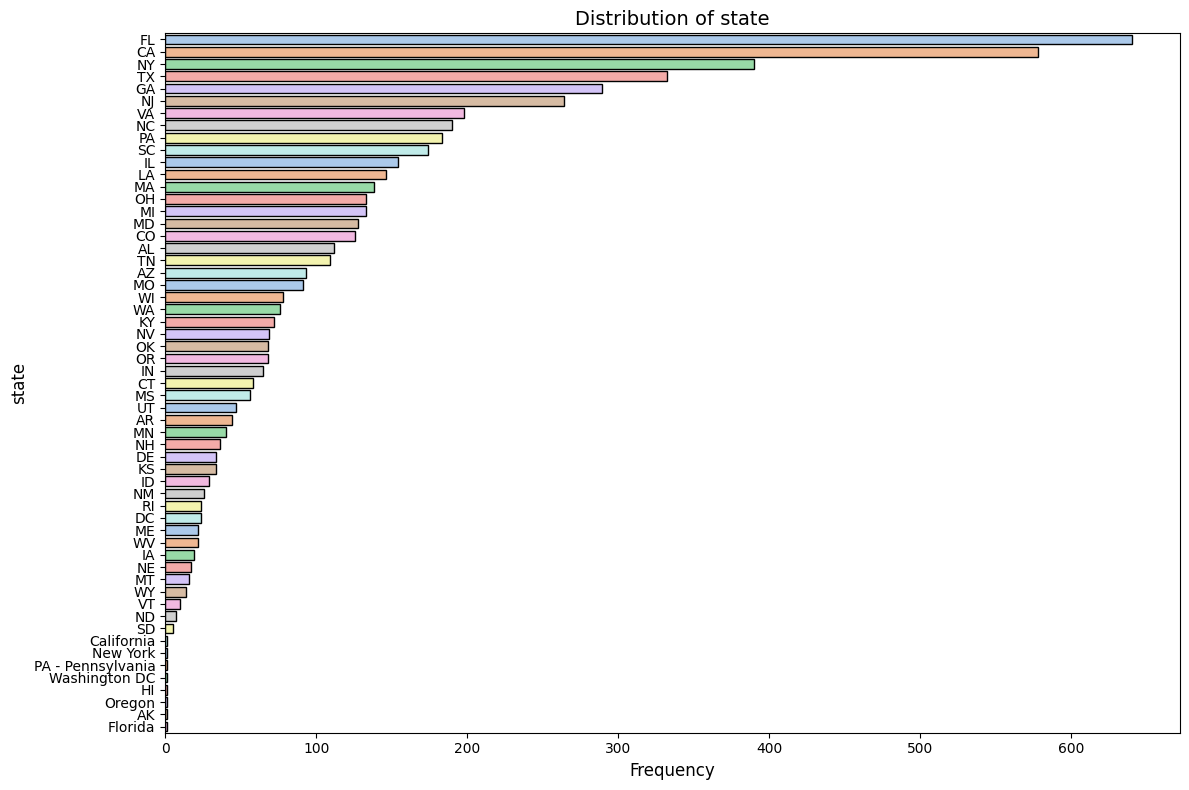

/tmp/ipykernel_109016/1164915385.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=column, order=order, palette='pastel', edgecolor='black')


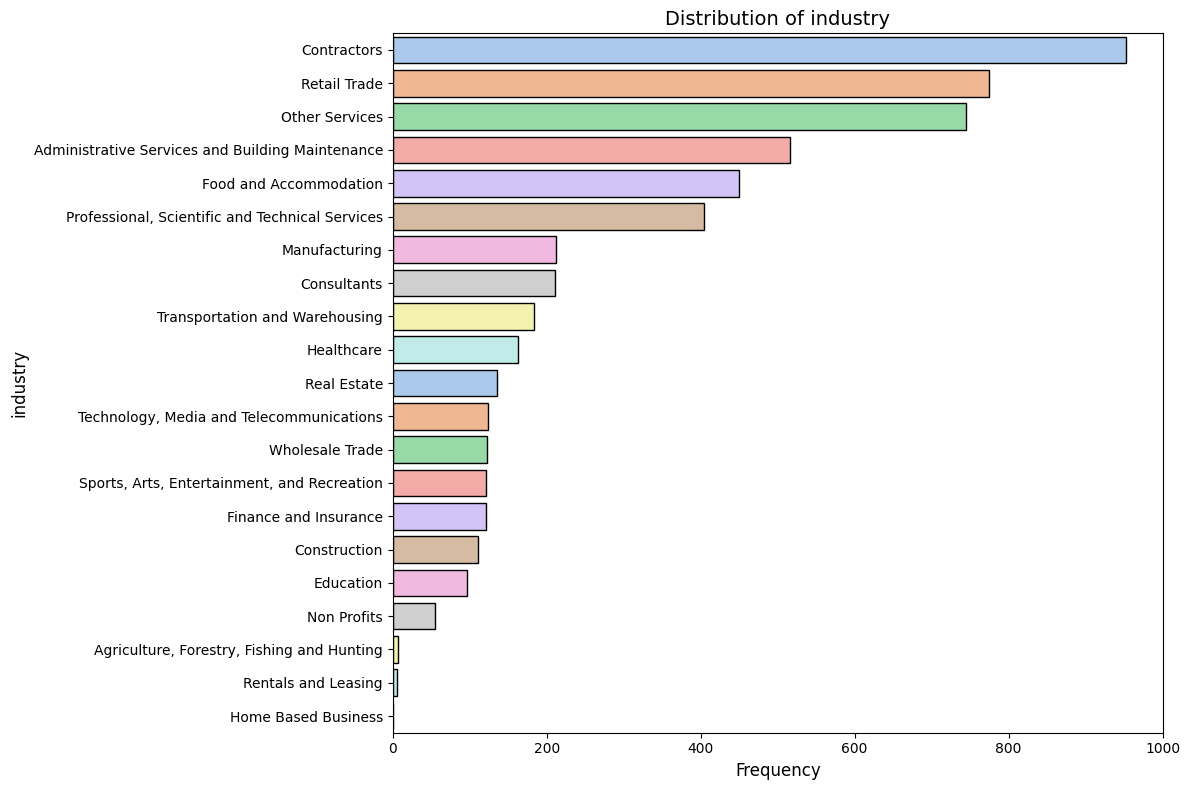

/tmp/ipykernel_109016/1164915385.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=column, order=order, palette='pastel', edgecolor='black')


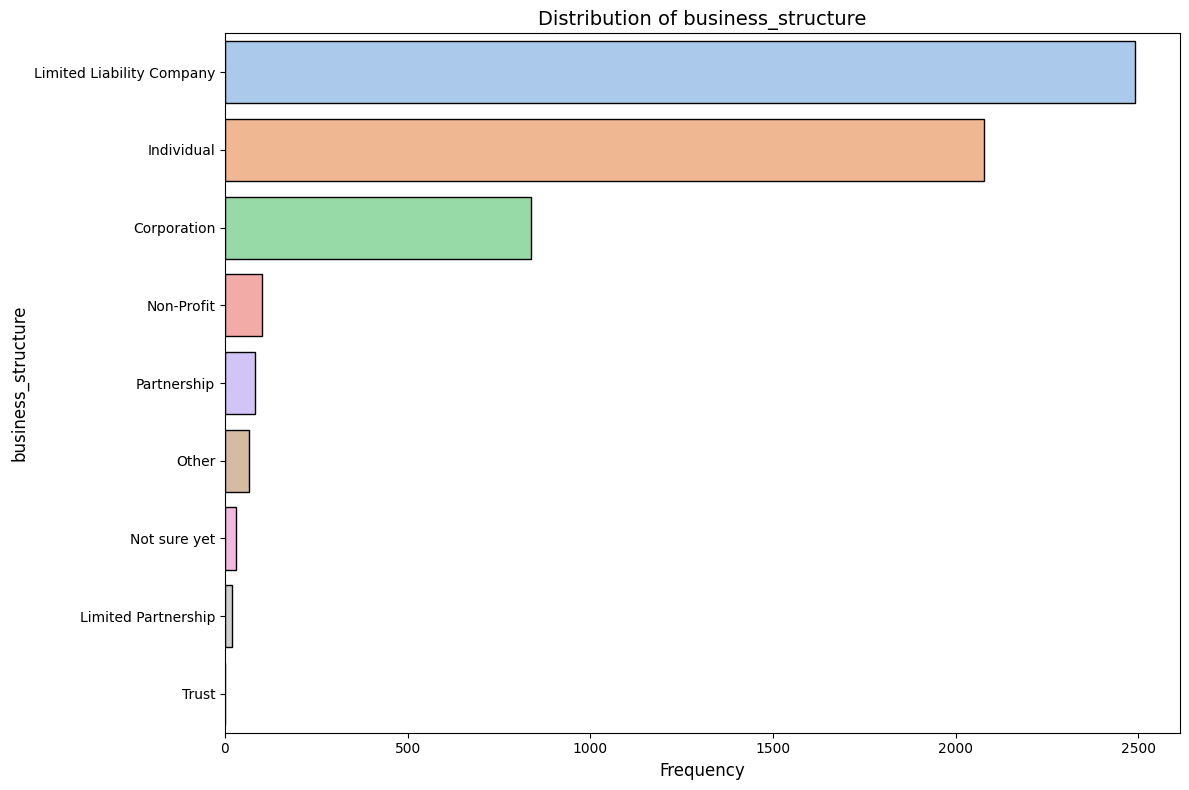

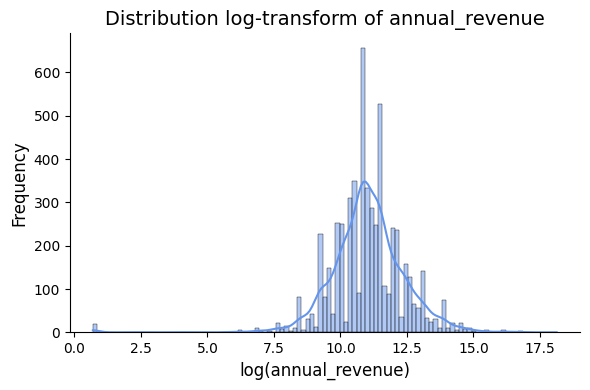

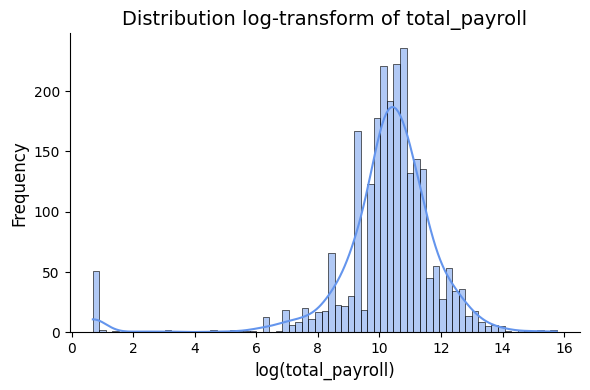

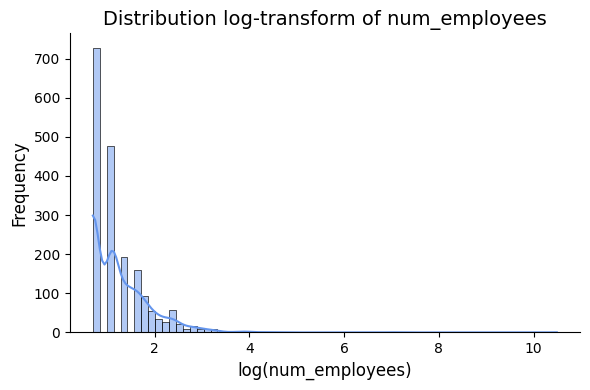

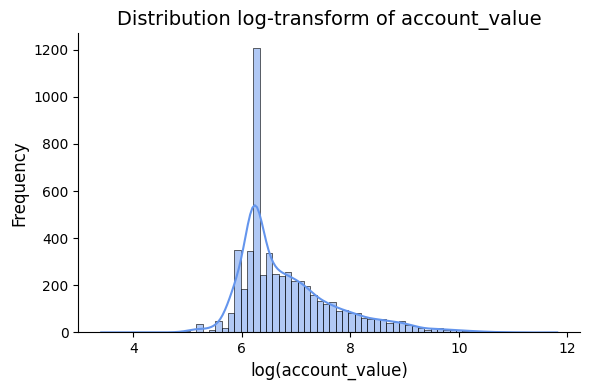

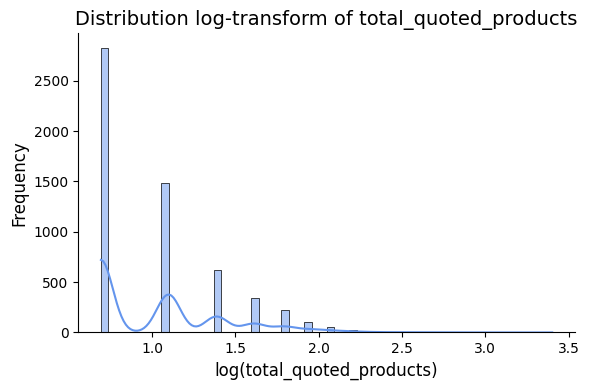

In [9]:
# Let's plot the distribution the values

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_categorical_distribution(df, column):
    plt.figure(figsize=(9, 6))
    sns.countplot(data=df, x=column, palette='pastel', edgecolor='black')
    plt.title(f'Distribution of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.xticks(rotation=30)
    sns.despine()
    plt.tight_layout()
    plt.show()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_categorical_horizontal(df, column):
    plt.figure(figsize=(12, 8))
    order = df[column].value_counts().index
    sns.countplot(data=df, y=column, order=order, palette='pastel', edgecolor='black')
    plt.title(f'Distribution of {column}', fontsize=14)
    plt.xlabel('Frequency', fontsize=12)
    plt.ylabel(column, fontsize=12)
    plt.tight_layout()
    plt.show()



def plot_numeric_distribution(df, column, log_transform=False):
    plt.figure(figsize=(6, 4))
    data = df[column].dropna()
    if log_transform:
        data = np.log1p(data[data > 0])
        label = f'log({column})'
        title = f'Distribution log-transform of {column}'
    else:
        label = column
        title = f'Distribution of {column}'
    sns.histplot(data, kde=True, color='cornflowerblue', edgecolor='black')
    plt.title(title, fontsize=14)
    plt.xlabel(label, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    sns.despine()
    plt.tight_layout()
    plt.show()



categorical_columns = data.select_dtypes(include=['object']).columns
categorical_columns = [x for x in categorical_columns if x not in ['account_uuid','subindustry']]
numeric_columns = data.select_dtypes(include=['number']).columns
numeric_columns = [x for x in numeric_columns if x!='year_established']

for col in categorical_columns:
    plot_categorical_horizontal(data, col)
                 

for col in numeric_columns:
    plot_numeric_distribution(data, col,log_transform=True)


## Insights

The features <span style="color:orange">account_value</span>, <span style="color:orange">total_payroll</span> and <span style="color:orange">annual_revenue</span> follow a skewed distribution (long tail): few high values and many low and medium values, which is very common from financial enterprise data.

Applying the logarithm helps revealing the central structure and outlier: most companies have income, payroll and accounts within specific ranges, the logarithmic transformation helps to identify the tails and extremes without these obscuring the behaviour of the majority.Peaks and modes are visible: especially in account_value, there is a dominant value (probably a standard minimum account). The tails to the right identify a minority of companies with large amounts, which is useful for market segmentation, risk or anomaly detection, and statistical model adjustment. The graphs are better for analysis and modeling than the original values, since the log transformation stabilizes variance and reduces the impact of outliers in predictive models.


The distribution of the <span style="color:orange">num_employees</span> is highly right-skewed. The vast majority of companies have very few employees, typically between 1 and 3, as shown by the high frequency at the lower end of the log scale. There is a long tail extending to the right, representing a small number of businesses with a much larger workforce. This pattern is typical for business populations where microenterprises dominate, and only a small fraction are larger companies. The logarithmic transformation helps reveal this structure by reducing the effect of outliers and making differences among small businesses more visible.


Now, from the graph of <span style="color:orange">total_quoted_products</span> shows that most companies contract very few products, with a strong peak at one product. There are smaller peaks at integer values indicating common counts like two or three products. The distribution is highly skewed right, with very few companies contracting many products. This pattern is typical in commercial markets and highlights opportunities for cross-selling and client segmentation.


In [ ]:
null_stats = pd.DataFrame({

    'Nulos': data.isnull().sum(),
    '% Nulos': (data.isnull().sum() / len(data)) * 100,
    'Tipo': data.dtypes,
    'Únicos': data.nunique()
})

null_stats
# We got null values in every comlumn except account_uuid, account_value and total_quoted_products.

,Nulos,% Nulos,Tipo,Únicos
account_uuid,0,0.000000,object,5709
state,20,0.350324,object,57
industry,194,3.398143,object,21
subindustry,194,3.398143,object,482
year_established,42,0.735681,float64,66
annual_revenue,31,0.543002,float64,313
total_payroll,55,0.963391,float64,268
business_structure,2,0.035032,object,9
num_employees,48,0.840778,float64,36
account_value,0,0.000000,float64,2664


In [ ]:

# Let's fill state, and business_structure with the mode. We have low number (<1%) of nulls here and the impact would be minimal no matter what approach we take.
# Besides, we don't have any other information to make a better assumption, and in this case a percentage this low can be due to error in the data provided so we are not introducing too much bias in the data by imputing the mode.


data['state'].fillna(data['state'].mode()[0], inplace=True) 
data['business_structure'].fillna(data['business_structure'].mode()[0], inplace=True) 


# Now for the industry and subindustry, since the perentage of nulls is higher (around 3.4%) we can create a new category 'Unknown' to fill the nulls, so we don't lose the information that this data was missing and we don't introduce too much bias in the data.
data['industry'].fillna('Unknown', inplace=True)
data['subindustry'].fillna('Unknown', inplace=True)



/tmp/ipykernel_1326/2872725892.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['state'].fillna('Unknown',inplace=True)  # 'Unknown'
/tmp/ipykernel_1326/2872725892.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

In [ ]:
# Now let's analyze the num_employees. In this case, depending on the business_structure we can have a better idea of the number of employees. For example, if the business_structure is 'Individual' 
# it is very likely that the number of employees is 0 or 1. On the other hand, if the business_structure is 'Corporation' it is more likely that the number of employees is higher.
median_by_structure = data.groupby(['business_structure'])['num_employees'].median()


median_by_structure

business_structure
Corporation                  1.0
Individual                   0.0
Limited Liability Company    0.0
Limited Partnership          0.0
Non-Profit                   0.0
Not sure yet                 0.0
Other                        0.0
Partnership                  0.0
Trust                        0.0
Name: num_employees, dtype: float64

In [ ]:
# Let's also consider the industry, since some industries are more likely to have a higher number of employees than others.
# For example, a 'Retail' business is more likely to have a higher number of employees than a 'Consulting' business, even if both are 'Corporation'.
# median_by_structure = data.groupby(['business_structure','industry'])['num_employees'].median()

# median_by_structure = median_by_structure.reset_index()

# # Crear un diccionario para mapear (business_structure, industry) a mediana de num_employees
# median_map = median_by_structure.set_index(['business_structure', 'industry'])['num_employees'].to_dict()


# Opción 1: Mediana por industry/state
data['year_established'] = data.groupby(['business_structure','industry'])['num_employees'].transform(
    lambda x: x.fillna(x.median())
)



# # Functions to imput the values using the dictionary
# def imputar_num_employees(row):
#     if pd.isna(row['num_employees']):
#         key = (row['business_structure'], row['industry'])
#         # We look for the median value based on business_structure and industry that we calculated before and in case that the combination is not found we use the overall median of the column
#         return median_map.get(key, median_by_structure['num_employees'].median())
#     else:
#         return row['num_employees']

# # Apply the function to the dataframe row by row
# data['num_employees'] = data.apply(imputar_num_employees, axis=1)


In [31]:
# NO rellenar - la ausencia es información importante
# Crear indicadores binarios
data['has_industry'] = (~data['industry'].isna()).astype(int)
data['has_subindustry'] = (~data['subindustry'].isna()).astype(int)

# Para encoding, tratar vacíos como categoría
data['industry'].fillna('Not_Specified', inplace=True)
data['subindustry'].fillna('Not_Specified', inplace=True)

/tmp/ipykernel_75501/674363633.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['industry'].fillna('Not_Specified', inplace=True)
/tmp/ipykernel_75501/674363633.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [ ]:
# Opción 1: Mediana por industry/state
data['year_established'] = data.groupby(['industry', 'state'])['year_established'].transform(
    lambda x: x.fillna(x.median())
)
